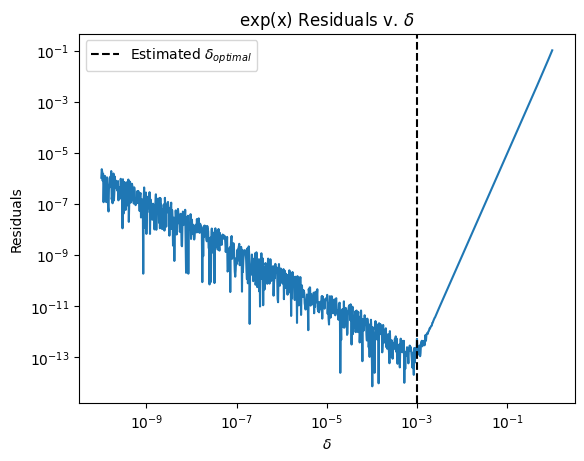

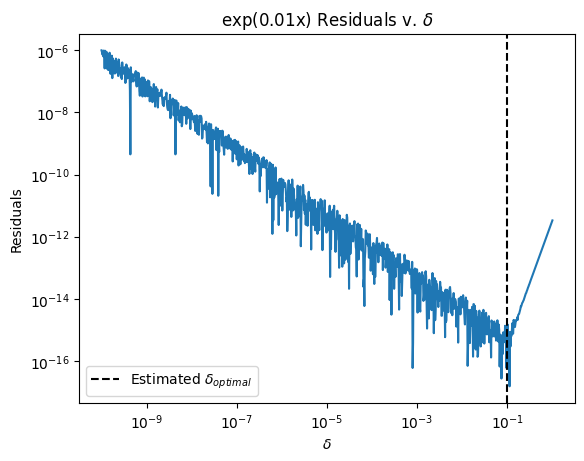

In [289]:
#################Problem 1#################
###########################################

import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate as intrp


#Parts of the code in this assignment were adapted from the lecture notes.
epsi=1e-16 
logdx=np.linspace(-10,0,1001)
dx=10**logdx

#point about which the derivative of a function is evaluated
x0=1

##exp(x)
#exp(x) error calculations
epsi_est=(10*10**(-16))**(1/5)
fun=np.exp

#increments for derivative expression
y0=fun(x0)
y1=fun(x0+dx)
y2=fun(x0-dx)
y3=fun(x0+2*dx)
y4=fun(x0-2*dx)

d1=(8*y1-8*y2-y3+y4)/(12*dx) #calculate f'
plt.ion() #no click needed
plt.clf()
#log-log plot of absolute value errors in derivatives
plt.loglog(dx,np.abs(d1-np.exp(x0)))
plt.xlabel(''r'$\delta$')
plt.ylabel('Residuals')
plt.title('exp(x) Residuals v. 'r'$\delta$')
plt.axvline(x=epsi_est, c='k', label='Estimated 'r'$\delta_{optimal}$', linestyle='dashed')
plt.legend()
plt.show()


##################################
##exp(0.01x)
#exp(0.01x) error calculations
epsi_est2=(10*10**(-16)/10**(-10))**(1/5)
def fun2(x):
    return np.exp(0.01*x)

#increments for derivative expressxion
y0=fun2(x0)
y1=fun2(x0+dx)
y2=fun2(x0-dx)
y3=fun2(x0+2*dx)
y4=fun2(x0-2*dx)

d1=(8*y1-8*y2-y3+y4)/(12*dx) #calculate f'
plt.ion() #no click needed
plt.clf()
#log-log plot of absolute value errors in derivatives
plt.loglog(dx,np.abs(d1-0.01*fun2(x0)))
plt.xlabel(''r'$\delta$')
plt.ylabel('Residuals')
plt.title('exp(0.01x) Residuals v. 'r'$\delta$')
plt.axvline(x=epsi_est2, c='k', label='Estimated 'r'$\delta_{optimal}$', linestyle='dashed')
plt.legend()
plt.show()


In [290]:
#################Problem 2#################
###########################################

#Write a numerifcal differentiator according to the given prototype.
def ndiff(fun, x, full=False):

    epsi=1e-16;#double precision float rounding error
    dx=epsi**(1/3); #initial pick for δ
    #increments for derivative expression
    y0=fun(x0)
    y1=fun(x0+dx)
    y2=fun(x0-dx)
    y3=fun(x0+2*dx)
    y4=fun(x0-2*dx)

    #third derivative according to centered difference
    d3=(y3-2*y1+2*y2-y4)/(2*dx**3)

    #optimal δ in the centered difference 
    dx=np.abs(fun(x)*epsi/d3)**(1/3)

    #centered difference f'
    df_dx=(fun(x+dx)-fun(x-dx))/(2*dx)

    #total error estimation
    dif_err=np.abs(fun(x)*epsi/dx+d3*dx**2)
   
    if full==False:
        return df_dx
    else:
        return df_dx, dx, dif_err

#output test of ndiff function for full=True
true_output=ndiff(np.sin, np.pi/3, full=True)

print('\n Numerical f\' = {}'.format(true_output[0])+
      '\n Optimal dx = {}'.format(true_output[1])+
      '\n Error = {}'.format(true_output[2]))

















































 Numerical f' = 0.49999999999903905
 Optimal dx = 4.2727432880778035e-06
 Error = 4.0537207381538796e-11


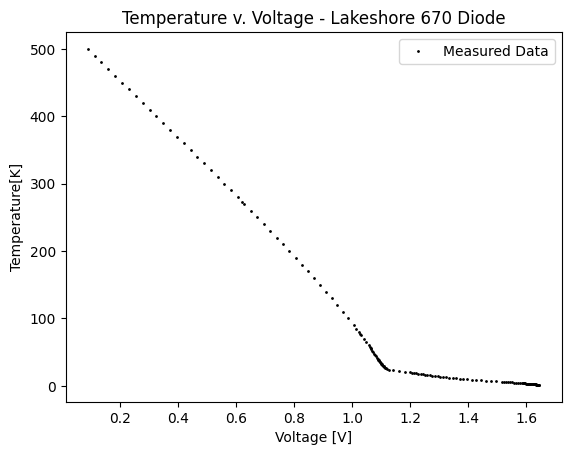


 Interpolated T = [495.66893911 449.83926639 404.88266121 359.373201   313.44106876
 266.80876604 218.75167553 168.88359887 115.78756526  55.4572273
  21.56260931  14.87796393   9.92633952   6.61195168   3.46405911]
 Error = [5.36063948e-01 1.04116591e-01 3.42259372e-02 3.08776391e-02
 7.79231647e-02 6.82072230e-02 6.64582285e-02 5.33257780e-02
 3.63940481e-02 1.74208697e-02 7.88559830e-01 2.11902464e-02
 1.56993879e-03 1.47127940e-03 4.39957914e-04]


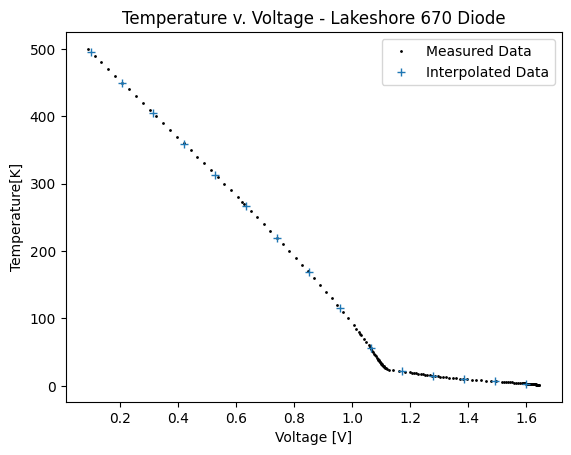

In [291]:
#################Problem 3#################
###########################################

#import Lakeshore experimental data
data=np.loadtxt('lakeshore.txt')

Traw=data[:,0]#raw T data
Vraw=data[:,1]#raw V data
dV_dt=data[:,2]#dV/dT data

#initial plot T v. V
plt.plot(Vraw,Traw, 'ok', ms=1,label='Measured Data')
plt.ylabel('Temperature[K]')
plt.xlabel('Voltage [V]')
plt.title('Temperature v. Voltage - Lakeshore 670 Diode')
plt.legend()
plt.show()

def lakeshore(V,data): 
    Traw=np.flipud(data[:,0])#ordered T data
    Vraw=np.flipud(data[:,1])#ordered V data
    #spline interpolate - cubic
    spl=intrp.splrep(Vraw,Traw)
    spl_T=intrp.splev(V,spl)

    #bootstrap error estimation
    Nt=1200#total number of sampling rounds
    rindex=list(range(Vraw.size)) #list of indices
    rframe=int(0.4*(Vraw.size))#frame size of reading - 40% of data
    T_ests=[]#estimated T values
    for i in range(Nt):  
        rnd=np.random.default_rng()#random number
        rset=rnd.choice(rindex,size=rframe, replace=False) #subset of data to interpolate
        rset.sort() #ascending order sort of subset data
        T_set=Traw[rset]#subset of T
        V_set=Vraw[rset]#subset of V
        rset_intrp=intrp.splrep(V_set, T_set)#spline interpolate subset
        T_intrp=intrp.splev(V,rset_intrp)#estimated T from subset interpolate
        T_all=intrp.splev(V,spl)#estimated T from overallinterpolate
        T_ests.append(np.abs(T_intrp-T_all))

    #Calculate error 
    T_err=np.std(T_ests, axis=0)

    return spl_T, T_err

V1=np.linspace(0.1, 1.6, 15)
V=V1
T_est, err_est=lakeshore(V,data)

print('\n Interpolated T = {}'.format(T_est)+
      '\n Error = {}'.format(err_est))

#interpolated plot T v. V
plt.plot(Vraw,Traw, 'ok', ms=1,label='Measured Data')
plt.plot(V,T_est, '+', ms=6,label='Interpolated Data')
plt.ylabel('Temperature[K]')
plt.xlabel('Voltage [V]')
plt.title('Temperature v. Voltage - Lakeshore 670 Diode')
plt.legend()
plt.show()

[ 9.99990995e-01  0.00000000e+00 -4.05281085e-01 -1.13686838e-13
  2.27373675e-13  9.45089878e-02  0.00000000e+00  6.23367409e-03]
[ 9.99990995e-01  0.00000000e+00 -4.05281085e-01 -1.13686838e-13]
[2.27373675e-13 9.45089878e-02 0.00000000e+00 6.23367409e-03]


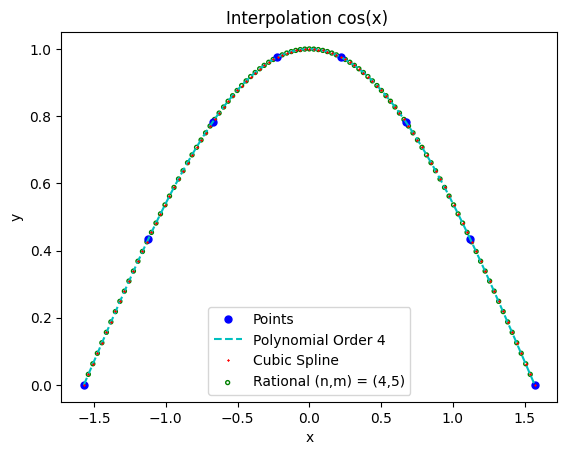

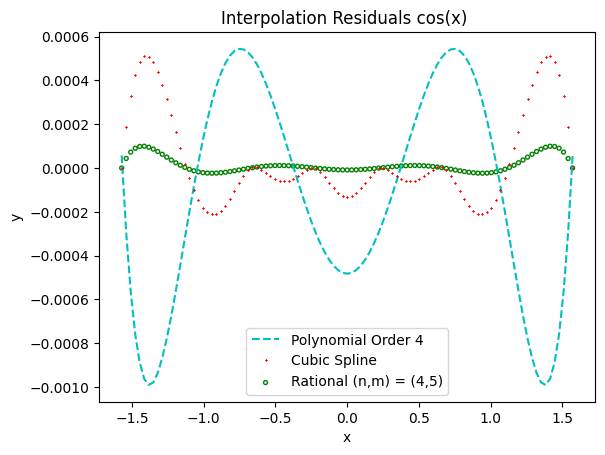


 Error in Polynomial = 0.00048245893737964565
 Error in Cubic Spline = 0.00020596732577115602
 Error in Rational = 3.475001630928141e-05
[ 9.99990995e-01  0.00000000e+00 -4.05281085e-01 -1.13686838e-13
  0.00000000e+00  9.45089878e-02  2.84217094e-14  6.23367409e-03]
[ 9.99990995e-01  0.00000000e+00 -4.05281085e-01 -1.13686838e-13]
[0.00000000e+00 9.45089878e-02 2.84217094e-14 6.23367409e-03]


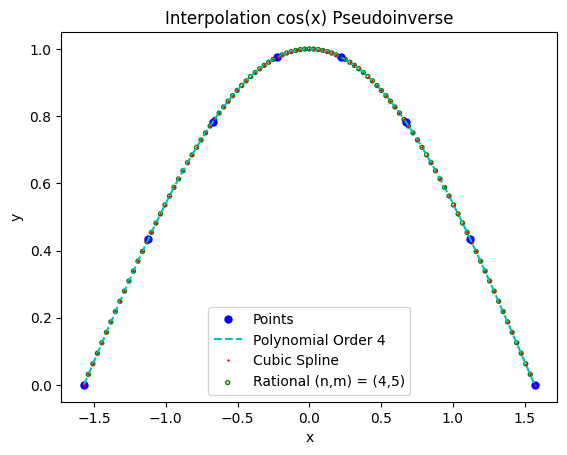

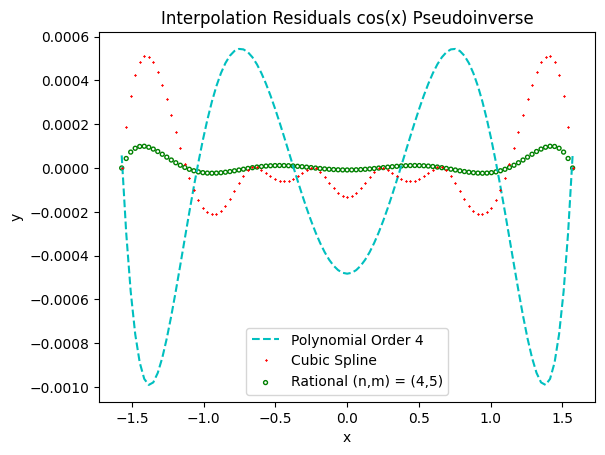


 Error in Polynomial = 0.00048245893737964565
 Error in Cubic Spline = 0.00020596732577115602
 Error in Rational = 3.475001631240045e-05
[ -4.29862069 -20.           2.           3.96729867 -14.
   4.          -2.           0.        ]
[ -4.29862069 -20.           2.           3.96729867]
[-14.   4.  -2.   0.]


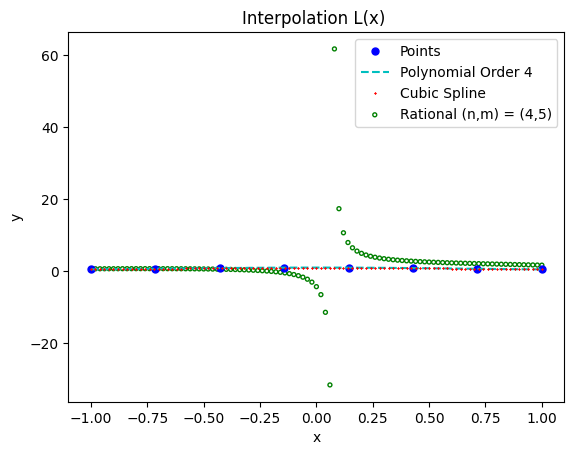

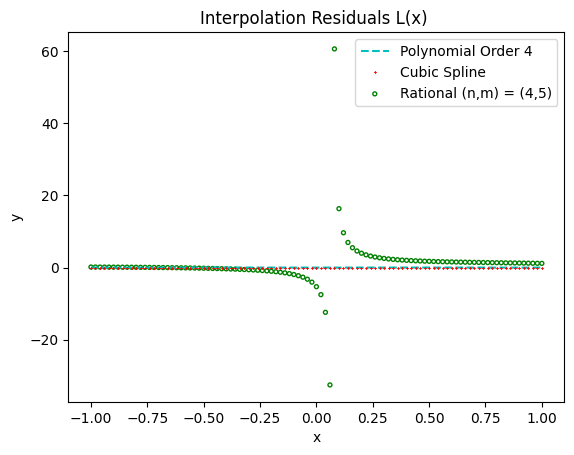


 Error in Polynomial = 0.005880852260193621
 Error in Cubic Spline = 0.0006729513393493166
 Error in Rational = 7.420266293126848
[ 1.00000000e+00  1.33226763e-15 -3.33333333e-01 -1.33226763e-15
  2.22044605e-15  6.66666667e-01 -1.77635684e-15 -3.33333333e-01]
[ 1.00000000e+00  1.33226763e-15 -3.33333333e-01 -1.33226763e-15]
[ 2.22044605e-15  6.66666667e-01 -1.77635684e-15 -3.33333333e-01]


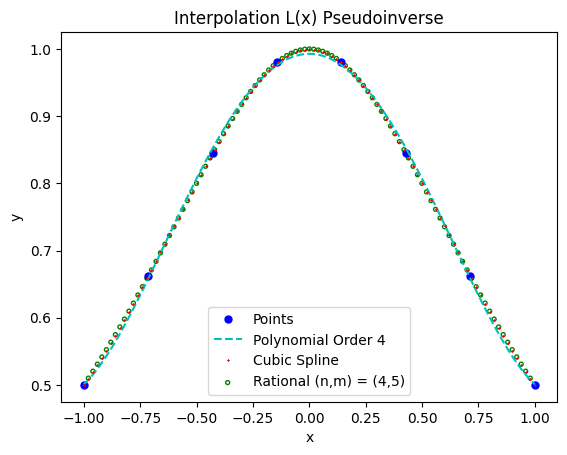

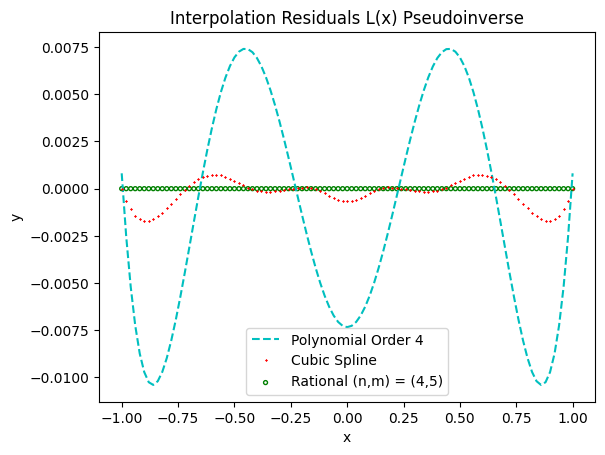


 Error in Polynomial = 0.005880852260193621
 Error in Cubic Spline = 0.0006729513393493166
 Error in Rational = 2.0885962166032388e-16
[1.0000000e+00 4.4408921e-16 8.8817842e-16 1.0000000e+00]
[1.0000000e+00 4.4408921e-16]
[8.8817842e-16 1.0000000e+00]


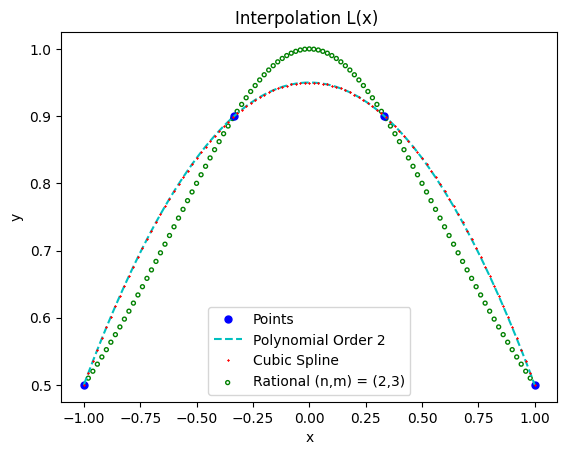

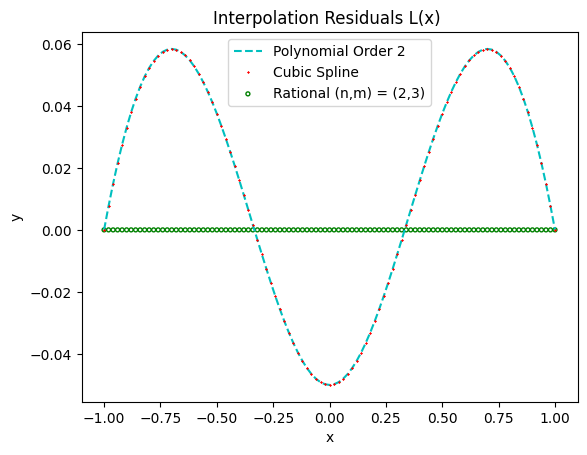


 Error in Polynomial = 0.03687691843095018
 Error in Cubic Spline = 0.036876918430950215
 Error in Rational = 1.1517294427214086e-16
[1.0000000e+00 8.8817842e-16 8.8817842e-16 1.0000000e+00]
[1.0000000e+00 8.8817842e-16]
[8.8817842e-16 1.0000000e+00]


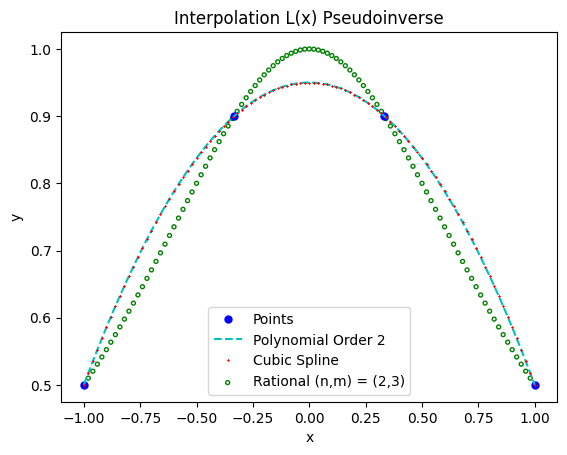

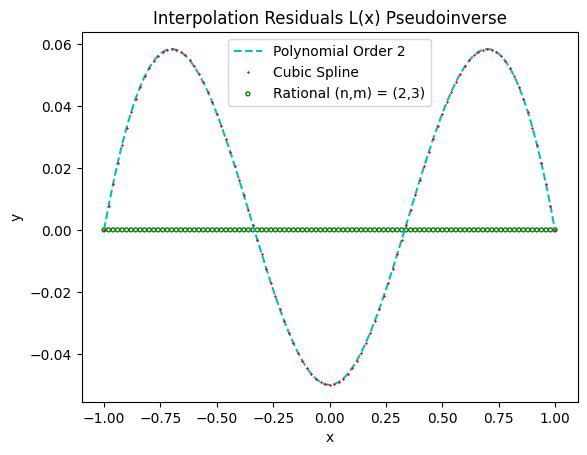


 Error in Polynomial = 0.03687691843095018
 Error in Cubic Spline = 0.036876918430950215
 Error in Rational = 1.5379019514664036e-16


In [357]:
#################Problem 4#################
###########################################
#functions from lecture notes
def lorentz(x):
    return 1/(1+x**2)

def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m,pse=False):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    #print(mat)
    if pse==False:
        pars=np.dot(np.linalg.inv(mat),y)
    else:
        pars=np.dot(np.linalg.pinv(mat),y)
    print(pars)
    p=pars[:n]
    q=pars[n:]
    print(p)
    print(q)
    return p,q

def poly_fit(ff, x1, x2,order):
    f1=ff
    #polynomial fit 4th order
    f1cos_p1=np.polyfit(x1,f1y1,order)
    f1cos_p2=np.polyval(f1cos_p1,x2)
    return f1cos_p2

def spln_fit(ff, x1, x2):
    f1=ff
     #cubic spline fit
    f1cos_spl1=intrp.splrep(x1,f1(x1))
    f1cos_spl2=intrp.splev(x2,f1cos_spl1)
    return f1cos_spl2

#function to plot with/without pinv
def funplot(x1,f1y1,f1y2,f1cos_p2,f1cos_spl2,f1cos_rat2,n,m,fname,order, pinv=False):
    if pinv:
        pnv='Pseudoinverse'
    else:
        pnv=''
        #initial plot 
    plt.plot(x1,f1y1, 'ob', ms=5,label='Points')
    plt.plot(x2,f1cos_p2, '--c', ms=1,label='Polynomial Order {}'.format(order))
    plt.plot(x2,f1cos_spl2, 'xr', ms=1,label='Cubic Spline')
    plt.scatter(x2,f1cos_rat2, facecolors='none', edgecolors='g', s=8,
                label='Rational (n,m) = ({}'.format(n)+',{}'.format(m)+')')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolation {}'.format(fname)+' {}'.format(pnv))
    plt.legend()
    plt.show()

    #Residuals plot 
    plt.plot(x2,f1cos_p2-f1y2, '--c', ms=1,label='Polynomial Order {}'.format(order))
    plt.plot(x2,f1cos_spl2-f1y2, 'xr', ms=1,label='Cubic Spline')
    plt.scatter(x2,f1cos_rat2-f1y2, facecolors='none', edgecolors='g', s=8,
                label='Rational (n,m) = ({}'.format(n)+',{}'.format(m)+')')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolation Residuals {}'.format(fname)+' {}'.format(pnv))
    plt.legend()
    plt.show()

    print('\n Error in Polynomial = {}'.format(np.std(f1cos_p2-f1y2))+
          '\n Error in Cubic Spline = {}'.format(np.std(f1cos_spl2-f1y2))+
          '\n Error in Rational = {}'.format(np.std(f1cos_rat2-f1y2)))
    

#############

order=4 #poly fit order
#rational orders
n=4#numerator
m=5#denominator
pts=n+m-1#fixed number of points


#cos(x) analysis

#function domain
x1=np.linspace(-np.pi/2,np.pi/2, pts)
x2=np.linspace(-np.pi/2,np.pi/2, 101) #greater resolution
fc=np.cos
f1=fc

f1y1=f1(x1)#data points
f1y2=f1(x2)#reference cos(x) computed value

#polynomial fit results
f1cos_p2=poly_fit(fc, x1, x2, order)
#cubic spline fit results
f1cos_spl2=spln_fit(fc, x1, x2)

#rational fit
p1,q1=rat_fit(x1,f1y1,n,m,False)#True for pseudoinverse
f1cos_rat2=rat_eval(p1,q1,x2)

funplot(x1,f1y1,f1y2,f1cos_p2,f1cos_spl2,f1cos_rat2,n,m,'cos(x)',order, pinv=False)

#rational fit
p1,q1=rat_fit(x1,f1y1,n,m,True)#True for pseudoinverse
f1cos_rat2=rat_eval(p1,q1,x2)

funplot(x1,f1y1,f1y2,f1cos_p2,f1cos_spl2,f1cos_rat2,n,m,'cos(x)',order, pinv=True)

####################
#Lorentzian(x) analysis

order=4 #poly fit order
#rational orders
n=4#numerator
m=5#denominator
pts=n+m-1#fixed number of points

#function domain
x1=np.linspace(-1,1, pts)
x2=np.linspace(-1,1, 101) #greater resolution
fc=lorentz
f1=fc

f1y1=f1(x1)#data points
f1y2=f1(x2)#reference L(x) computed value

#polynomial fit results
f1cos_p2=poly_fit(fc, x1, x2, order)
#cubic spline fit results
f1cos_spl2=spln_fit(fc, x1, x2)


#rational fit
p1,q1=rat_fit(x1,f1y1,n,m,False)#True for pseudoinverse
f1cos_rat2=rat_eval(p1,q1,x2)

funplot(x1,f1y1,f1y2,f1cos_p2,f1cos_spl2,f1cos_rat2,n,m,'L(x)', order, pinv=False)

#rational fit
p1,q1=rat_fit(x1,f1y1,n,m,True)#True for pseudoinverse
f1cos_rat2=rat_eval(p1,q1,x2)

funplot(x1,f1y1,f1y2,f1cos_p2,f1cos_spl2,f1cos_rat2,n,m,'L(x)', order, pinv=True)

##Check L(x) for lower order
#rational orders
n=2#numerator
m=3#denominator
pts=n+m-1#fixed number of points
order=2#lower order


#function domain
x1=np.linspace(-1,1, pts)
x2=np.linspace(-1,1, 101) #greater resolution
fc=lorentz
f1=fc
f1y1=f1(x1)#data points
f1y2=f1(x2)#reference L(x) computed value

#polynomial fit results
f1cos_p2=poly_fit(fc, x1, x2, order)
#cubic spline fit results
f1cos_spl2=spln_fit(fc, x1, x2)


#rational fit
p1,q1=rat_fit(x1,f1y1,n,m,False)#True for pseudoinverse
f1cos_rat2=rat_eval(p1,q1,x2)

funplot(x1,f1y1,f1y2,f1cos_p2,f1cos_spl2,f1cos_rat2,n,m,'L(x)',order, pinv=False)

#rational fit
p1,q1=rat_fit(x1,f1y1,n,m,True)#True for pseudoinverse
f1cos_rat2=rat_eval(p1,q1,x2)

funplot(x1,f1y1,f1y2,f1cos_p2,f1cos_spl2,f1cos_rat2,n,m,'L(x)',order, pinv=True)